<h1>Predicting Handwritten Digits</h1>

<h3>The MNIST Dataset</h3>

<p>In this notebook, we will be using the <strong>MNIST(Modified National Institute of Standards and Technology) dataset of handwritten digits</strong>. which is a database of images of handwritten digits.<br/> MNIST stands for Modified National Institute of Standards and Technology</p>

<p>
    The version of the MNIST dataset that is built into scikit-learn has the images with only 8 by 8 pixels, so they are blurry and not coloured.<br/>
    However, there are different versions of this dataset with more pixels and with colors (not grayscale).
</p>

<p>First we load the dataset using as shown below, and to make things simple at the beginning of solving the problem, we will only be working with two digits (0 and 1) which can be acheived by setting the n_class input parameter to 2 when loading the dataset:</p>

In [1]:
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)

print(X.shape, y.shape)
print(X[0])
print(y[0])

(360, 64) (360,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


<p>We have 360 datapoints and each datapoint has 64 features (because each image is 8 x 8 pixels and we have 1 feature per pixel).</p>

<p>The value of a pixel or feature is on a grayscale where 0 is black and 16 is white.</p>

<p>To get a more intuitive view of the datapoint, we can reshape the array to be 8x8.</p>

In [2]:
print(X[0].reshape(8, 8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<p>By examining the reshaped array above closely we can see that the image is a 0, but we can do a better visualization than just that here, and that is off course to draw the image itself here.</p>

<h3>Drawing the Digits</h3>

<p>
    We use the matplotlib function <strong>matshow</strong> to draw the image and make use of the <strong>cmap</strong> parameter to indicate that the image should be in a grayscale rather than colored.
</p>

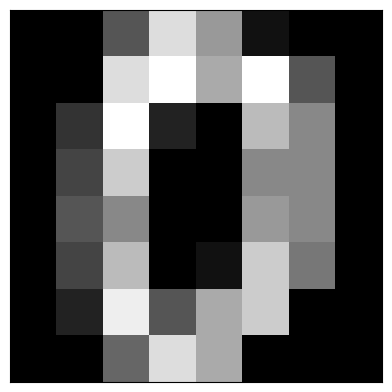

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())  # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()

<strong>
    You can see that with only 64 pixels the image is very pixelated!<br/>However, even with these blurry images we can build an excellent model.
</strong>

<h3>MLP for MNIST Dataset</h3>

<p>
    Now we use the MLPClassifier to do a train/test split for the MNIST dataset, and then train an MLPClassifier on the training set coded below:
</p>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

<p>Let’s look at how the model predicts the first datapoint in the test set by drawing the test image and comparing it to the prediction made by the MLP network</p>

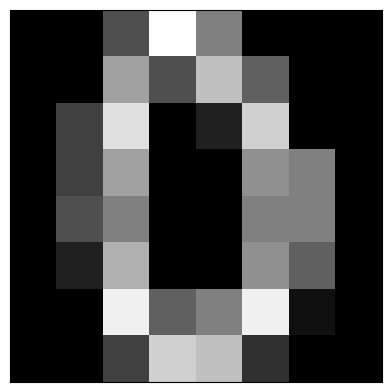

[0]


In [5]:
x = X_test[0]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))

<strong>We can see that this is a 0 and that our model correctly predicts 0.</strong>

<p>Furthermore we can also examine the next/second element in the dataset</p>

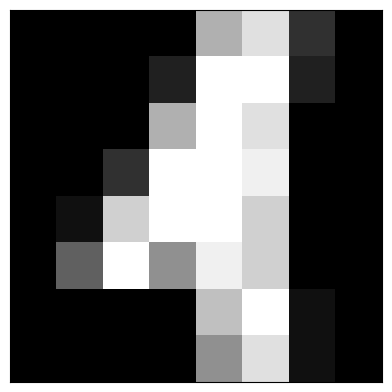

[1]


In [6]:
x = X_test[1]
plt.matshow(x.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()
print(mlp.predict([x]))

<strong>This is aslo clearly a 1 and our model again gets the correct prediction.</strong>

<p>Now we want to see the model’s accuracy on the entire test set.</p>

In [7]:
print("MLP accuracy: ", mlp.score(X_test, y_test))

MLP accuracy:  1.0


<strong>
    Our model gets 100% accuracy!<br/>
    Promising result! but remember that we are only using two classes 0 and 1 which is easier digits to distinguish between<br/>
    So can the model perform well with distinguishing harder examples with more classes? Let's find out!
</strong>

<h3>Classifying all 10 Digits</h3>

<p>
    Since neural networks easily generalize to handle multiple outputs, we can just remove the n_class=2 when loading the dataset and the rest of the code would be the exact same as above.
</p>

In [8]:
X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

mlp = MLPClassifier(random_state=2)
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))

0.96


<strong>
    So we got 96% of the datapoints in the test set correct. 
</strong>

<p>
    Let’s look at the ones we got incorrect.<br/>
    We use a numpy mask to pull out just the datapoints we got incorrect.<br/>
    We pull the x values, the true y value as well as the predicted value.
</p>

In [9]:
y_pred = mlp.predict(X_test)

incorrect = X_test[y_pred != y_test]
incorrect_true = y_test[y_pred != y_test]
incorrect_pred = y_pred[y_pred != y_test]

print("Number of inncorrect classification is", len(incorrect))

Number of inncorrect classification is 18


<p>Let’s look at all the images that we got wrongly classified and what our prediction was.</p>

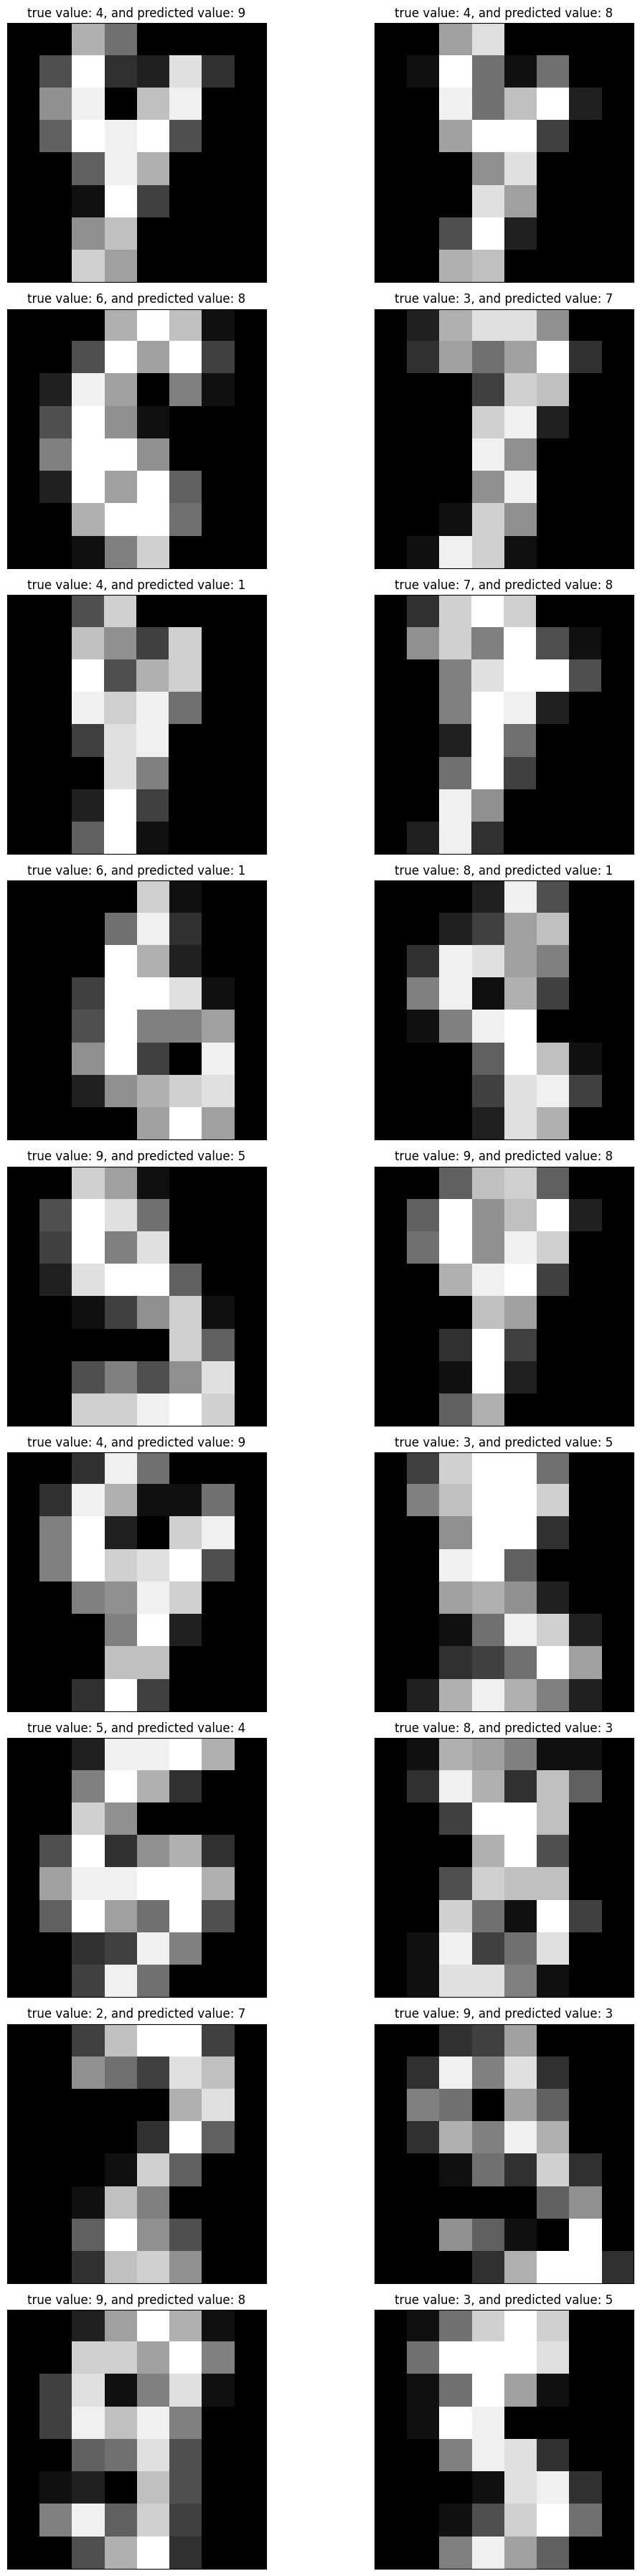

In [10]:
# Create subplots with 9 rows and 2 columns
fig, axes = plt.subplots(int(len(incorrect)/2), 2, figsize=(12, 36))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each element of the array in a separate subplot
for index in range(len(incorrect)):
    axes[index].matshow(incorrect[index].reshape(8, 8), cmap=plt.cm.gray)
    axes[index].set_xticks([])  # Remove x-axis ticks for simplicity
    axes[index].set_yticks([])  # Remove y-axis ticks for simplicity
    axes[index].set_title(f'true value: {incorrect_true[index]}, and predicted value: {incorrect_pred[index]}')

# Adjust layout
plt.tight_layout()
plt.show()

<strong>
    You can see from looking at the images that a human might also be confused.<br/>
    For example, take a good look at the first image, it is not obvious whether it is a 4 or a 9.
</strong>